# **OVERVIEW:**

# IMAGE CLASSIFICATION FOR PROJECT "MAID"
**Feasibility study on “TRANSFORMING TOMORROW's SUPERMARKET TODAY" commissioned by "ValuePRICE SUPERMARKET PTE LTD"**

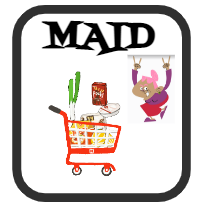

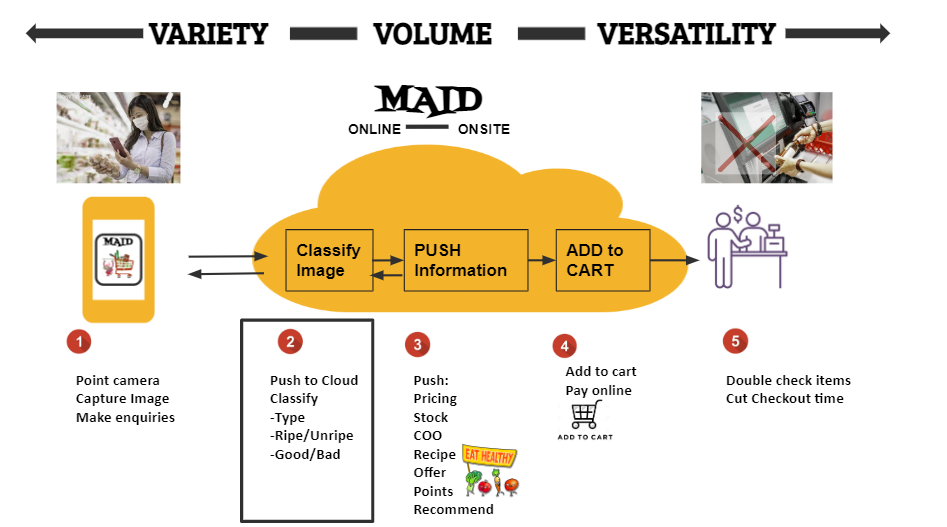

There are 2 objectives for this feasibility study:

**Objective #1: Image Classification for 3 categories of products found in supermarkets with a target accuracy of at least 90%**. 
> The categories are:

> a. Fruits

> b. Packages

> c. Vegetables

**Objecetive #2: Recommend a few Machine Learning Models to be used in actual deployment**


Implementation:
We will use Deep Learning on several models (base and pre-trained) for this study.

Dataset is taken from Kaggle:
https://www.kaggle.com/datasets/amoghmisra27/grocery

This dataset has 5122 images for Train, Validation and Test.  We will employ online Augmentation to increase and regularize the dataset. 


**TABLE OF CONTENTS:**

1.  Check software versions
2.  Import libraries
3.  Generate dataset
4.  Visualise the data
5.  Use image Data Augmentation
6.  Build the models
7.  Train the models
8.  Output results of models
9.  Display results of models
10. Evaluate models with test datasets

# **STEP 1: CHECK SOFTWARE VERSIONS**

In [ ]:
# Check keras and tensorflow versions

import tensorflow as tf
from tensorflow import keras

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

# **STEP 2: IMPORT LIBRARIES**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import Input
from tensorflow.keras import layers
from keras.layers import Flatten
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense, Dropout

from keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import VGG16
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import MobileNetV2

from keras import regularizers
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout, Flatten


# **STEP 3: GENERATE DATASETS**

In [5]:
# 3.1 DEFINE KEY PARAMETERS FOR DATASET

image_size  = (224, 224)  #image size
batch_size  = 32
rand_seed   = 42
val_split   = 0.2      # 80% used for Training, 20% for Validation
epochs      = 50
num_classes = 3        # No of classes - Fruits, Packages, Vegetables
# Note that due to categorical encoding, Fruits will be represented as 1,0,0 
# Packages as 0,1,0 and Vegetables as 0,0,1

train_path= '/kaggle/input/grocery2/train/train/'
test_path= '/kaggle/input/grocery2/test/test/'

regularizer = keras.regularizers.l2(0.01)

In [7]:
# 3.2 GENERATE DATASET FOR TRAINING

train_ds = image_dataset_from_directory(
    directory='/kaggle/input/grocery2/train/train/',
    class_names=['Fruit', 'Packages', 'Vegetables'],
    batch_size=batch_size,
    image_size=image_size,
    seed=rand_seed, 
    shuffle=True,
    validation_split= val_split,
    label_mode='categorical',
    subset='training'
)

Found 2640 files belonging to 3 classes.
Using 2112 files for training.


In [8]:
# 3.3 GENERATE DATASET FOR VALIDATION 

val_ds = image_dataset_from_directory(
    directory='/kaggle/input/grocery2/train/train/',
    class_names=['Fruit', 'Packages', 'Vegetables'],
    batch_size=batch_size,
    image_size=image_size,
    seed=rand_seed, 
    shuffle=True,
    validation_split=val_split,
    label_mode='categorical',
    subset='validation'
)


Found 2640 files belonging to 3 classes.
Using 528 files for validation.


In [ ]:
# 3.4 REVIEW DATASET DETAILS

for data, labels in train_ds:
    print(data.shape)  # 
    print(data.dtype)  # float32
    print(labels.shape)  # 
    print(labels.dtype)  # float32
    
    
# Returns a Dataset object  - a tuple (images, labels), where images has shape (batch_size, image_size[0], image_size[1], num_channels), and labels follows the format described below.
# if label_mode is categorical, the labels are a float32 tensor of shape (batch_size, num_classes), representing a one-hot encoding of the class index.

In [11]:
labels[0]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 0., 0.], dtype=float32)>

In [12]:
# 3.5 USE IMAGE GENERATOR TO INCREASE DATASETS TO IMRPOVE PERFORMANCE OF MODELS BECAUSE OUR DATASET IS NOT BIG ENOUGH

# Define new images

train_datagen = ImageDataGenerator(rotation_range = 0,
                             width_shift_range = 0,
                             height_shift_range = 0,
                             rescale = None,
                             shear_range = 0,
                             zoom_range = 0,
                             horizontal_flip = False,
                             fill_mode = 'nearest', 
                             validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=image_size,
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=image_size,
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)
test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=image_size,
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)


Found 2114 images belonging to 3 classes.
Found 526 images belonging to 3 classes.
Found 2485 images belonging to 3 classes.


# **STEP 4: VISUALISE DATA IN DATASET**

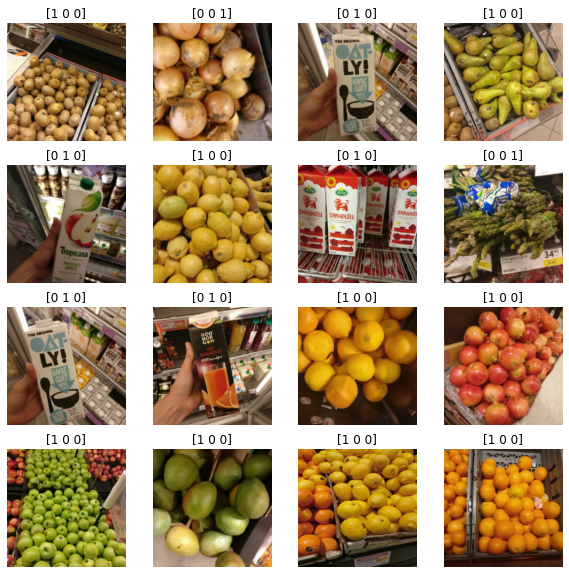

In [14]:
# RANDOM REVIEW OF IMAGE SAMPLES

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        ax.imshow(images[i].numpy().astype('uint8'))
        ax.set_title(labels[i].numpy().astype('uint8')  )
        ax.axis('off')
plt.show()


# .numpy() method converts a tensor object into an numpy.ndarray object. 
# This implicitly means that the converted tensor will be now processed on the CPU.

# **STEP 5: USE IMAGE AUGMENTATION**

When we don't have a large image dataset, it is a good practice to artifically introduce image diversity by adding some random yet realistic transformations to the training images. This helps expose our model to different aspects of the training data while minimising overfitting.

We have chosen to use random horizontal flipping, small random rotations, and small random zooms. Below shows the effects of these transformations when compared against the original image.

For more details on Image Augmentation, see below:

https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

In [17]:
# CREATE AN AUGMENTATION LAYER

data_augmentation = Sequential(
    [layers.RandomFlip('horizontal'),
     layers.RandomRotation((-0.1, 0.1)),
     layers.RandomZoom((-0.2, 0.2))
    ]
)

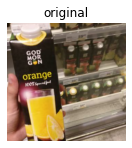

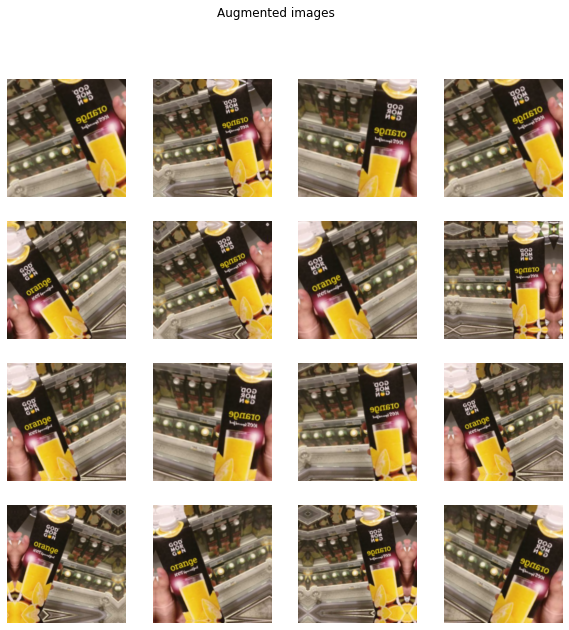

In [18]:
# SHOW A FEW SAMPLES OF IMAGE AUGMENTATION FOR REFERENCE

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    ax = plt.subplot(441)
    ax.imshow(images[0].numpy().astype('uint8'))
    ax.set_title('original')
    ax.axis('off')

    fig = plt.figure(figsize=(10, 10))
    for i in range(16):
        augmented_image = data_augmentation(images[0], training=True) # training must be set to True
        ax = plt.subplot(4, 4, i+1)
        ax.imshow(augmented_image.numpy().astype('uint8'))
        ax.axis('off')
    fig.suptitle('Augmented images')
    plt.show()

# **STEP 6: BUILD MODELS**

Base Model, Transfer Learning Models VGG16, INCEPTION and MOBILENET

Transfer learning is about leveraging feature representations from a pre-trained model, so you don’t have to train a new model from scratch. 

The pre-trained models are usually trained on massive datasets that are a standard benchmark in the computer vision frontier. The weights obtained from the models can be reused in other computer vision tasks. 

These models can be used directly in making predictions on new tasks or integrated into the process of training a new model. Including the pre-trained models in a new model leads to lower training time and lower generalization error.  

For more details on transfer learning, see below:

https://neptune.ai/blog/transfer-learning-guide-examples-for-images-and-text-in-keras

For details on VGG16, INCEPTION see below:
https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/

In [19]:
# 6.1 Define augmentation layer

augmentation_layer = Sequential(
    [layers.RandomFlip('horizontal'),
     layers.RandomRotation((-0.2, 0.2)),
     layers.RandomZoom((-0.2, 0.2))
    ]
)


**6.1 USE A BASE CNN MODEL**

In [20]:
basemodel = Sequential()
basemodel.add(Input(shape=image_size+(3,)))
basemodel.add(augmentation_layer)
basemodel.add(layers.Rescaling(1.0/255))

for size in [32, 64, 128, 512]:
    basemodel.add(layers.Conv2D(size, 3, padding='same', activation='relu'))
    basemodel.add(layers.BatchNormalization())
    basemodel.add(layers.MaxPooling2D(pool_size=2))
    basemodel.add(layers.Dropout(0.5))
    
    
#for size in [128, 256, 512]:
#    basemodel.add(layers.SeparableConv2D(size, 3, padding='same', activation='relu'))
#    basemodel.add(layers.BatchNormalization())
#    basemodel.add(layers.SeparableConv2D(size, 3, padding='same', activation='relu'))
#    basemodel.add(layers.BatchNormalization())
#    basemodel.add(layers.MaxPooling2D(pool_size=2))
#    basemodel.add(layers.Dropout(0.5))
    

In [21]:
# FULLY CONNECTED LAYER

basemodel.add(layers.Flatten())
basemodel.add(layers.Dense(512, activation='relu'))
basemodel.add(Dropout(0.4))
basemodel.add(layers.Flatten())
basemodel.add(layers.Dense(3, activation='softmax'))

In [22]:
basemodel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)     

**6.2 USE TRANSFER LEARNING - VGG16**

In [23]:
vgg16layer = VGG16(
    weights='imagenet', 
    include_top=False, 
)
vgg16layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [24]:
vgg16model = keras.Sequential()
vgg16model.add(Input(shape=image_size+(3,)))
vgg16model.add(augmentation_layer)
vgg16model.add(layers.Rescaling(1.0/255))
vgg16model.add(vgg16layer)

vgg16model.add(Dropout(0.4))
vgg16model.add(layers.Flatten())
vgg16model.add(layers.Dense(512, activation='relu'))
vgg16model.add(Dropout(0.2))
vgg16model.add(layers.Flatten()) 
vgg16model.add(layers.Dense(num_classes, activation='softmax'))

In [25]:
vgg16model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 512)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)              

**6.3 USING TRANSFER LEARNING - INCEPTION V3**

In [26]:
inceptlayer = InceptionV3(
    weights='imagenet', 
    include_top=False, 
)
inceptlayer.trainable = False

87924736/87910968 [==============================] - 0s 0us/step


In [27]:
inceptmodel = keras.Sequential()
inceptmodel.add(Input(shape=image_size+(3,)))
inceptmodel.add(augmentation_layer)
inceptmodel.add(layers.Rescaling(1.0/255))
inceptmodel.add(inceptlayer)

inceptmodel.add(layers.Flatten())
inceptmodel.add(Dropout(0.4))
inceptmodel.add(layers.Dense(512, activation='relu'))
inceptmodel.add(Dropout(0.2))
#inceptmodel.add(layers.Flatten()) 
inceptmodel.add(layers.Dense(num_classes, activation='softmax'))

In [28]:
inceptmodel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
flatten_4 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 51200)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)              

**6.4 USE TRANSFER LEARNING - MobileNetV2**

In [29]:
mobilelayer = MobileNetV2(
    weights='imagenet', 
    include_top=False, 
)
mobilelayer.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [31]:
mobilemodel = keras.Sequential()
mobilemodel.add(Input(shape=image_size+(3,)))
mobilemodel.add(augmentation_layer)
mobilemodel.add(layers.Rescaling(1./127.5, offset=-1))  #mobilenet requires pixel to be -1 to 1
mobilemodel.add(mobilelayer)

mobilemodel.add(layers.Flatten())
mobilemodel.add(layers.Dense(1024, activation='relu'))
mobilemodel.add(Dropout(0.5))
#inceptmodel.add(layers.Flatten()) 
mobilemodel.add(layers.Dense(num_classes, activation='softmax'))

**6.5  USE TRANSFER LEARNING - ResNet50** for future work

In [ ]:
reslayer = ResNet50(
    weights='imagenet', 
    include_top=False
)
reslayer.trainable = False


In [ ]:
reslayer.summary()

In [ ]:
resmodel = keras.Sequential()
resmodel.add(Input(shape=image_size+(3,)))
resmodel.add(augmentation_layer)
resmodel.add(layers.Rescaling(1.0/255))
resmodel.add(reslayer)

resmodel.add(Dropout(0.4))
resmodel.add(layers.Flatten())
resmodel.add(layers.Dense(256, activation='relu'))
resmodel.add(Dropout(0.2))
resmodel.add(layers.Flatten()) 
resmodel.add(Dense(3, activation='softmax'))


**6.6 USING TRANSFER LEARNING - EFFICIENTNET** for future work

In [ ]:
efnlayer = EfficientNetB0(
    weights='imagenet', 
    include_top=False, 
)
efnlayer.trainable = False


In [ ]:
efnmodel = keras.Sequential()
efnmodel.add(Input(shape=image_size+(3,)))
efnmodel.add(augmentation_layer)
efnmodel.add(layers.Rescaling(1.0/255))
efnmodel.add(efnlayer)

efnmodel.add(Dropout(0.4))
efnmodel.add(layers.Flatten())
efnmodel.add(layers.Dense(1024, activation='relu'))
efnmodel.add(Dropout(0.2))
efnmodel.add(layers.Flatten()) 
efnmodel.add(layers.Dense(3, activation='softmax'))

#, kernel_regularizer=regularizer

In [ ]:
efnmodel.summary()

# **STEP 7: TRAIN THE MODELS**

In [33]:
#  INTRODUCE CALLBACKS

early_stop = EarlyStopping(patience=4, monitor="val_accuracy")  
#Stop training when a monitored metric has stopped improving

lr_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=4,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
) 
#Reduce learning rate when a metric has stopped improving.

model_chkpt = ModelCheckpoint('save_at_{epoch}.h5')  
#Save the Keras model or model weights at some frequency

callbacks = [
    early_stop,
    lr_reduction,
    model_chkpt
]

#Callback is an object that can perform actions at various stages of training 
#(e.g. at the start or end of an epoch, before or after a single batch, etc).

**7.1  TRAIN USING BASE MODEL**

In [34]:
basemodel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.AUC()]
)

In [35]:
base_hist= basemodel.fit(train_generator,
                    validation_data = train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=epochs)

Epoch 1/50


2022-07-29 06:33:28.661416: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


66/66 [==============================] - 21s 183ms/step - loss: 26.0074 - accuracy: 0.6254 - precision: 0.6254 - recall: 0.6254 - auc: 0.7333 - val_loss: 7.0676 - val_accuracy: 0.2598 - val_precision: 0.2598 - val_recall: 0.2598 - val_auc: 0.4623
Epoch 2/50
66/66 [==============================] - 10s 153ms/step - loss: 4.1173 - accuracy: 0.6912 - precision: 0.6990 - recall: 0.6849 - auc: 0.8147 - val_loss: 5.0762 - val_accuracy: 0.4023 - val_precision: 0.4023 - val_recall: 0.4023 - val_auc: 0.5413
Epoch 3/50
66/66 [==============================] - 10s 143ms/step - loss: 0.9291 - accuracy: 0.7339 - precision: 0.7892 - recall: 0.6652 - auc: 0.8837 - val_loss: 3.2064 - val_accuracy: 0.4180 - val_precision: 0.4188 - val_recall: 0.4180 - val_auc: 0.5698
Epoch 4/50
66/66 [==============================] - 10s 145ms/step - loss: 0.6552 - accuracy: 0.7598 - precision: 0.8110 - recall: 0.6964 - auc: 0.9078 - val_loss: 5.8083 - val_accuracy: 0.2305 - val_precision: 0.2305 - val_recall: 0.2305 

In [ ]:
basemodel.save('basemodel.h5')

In [ ]:
base_hist = basemodel.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds
)

**7.2  TRAIN USING TRANSFER LEARNING - VGG16**

In [36]:
vgg16model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.AUC()]
)

In [37]:
vgg16_hist= vgg16model.fit(train_generator,
                    validation_data = train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=epochs)

Epoch 1/50
66/66 [==============================] - 15s 169ms/step - loss: 1.3881 - accuracy: 0.7589 - precision_1: 0.7614 - recall_1: 0.7570 - auc_1: 0.8840 - val_loss: 0.3143 - val_accuracy: 0.8613 - val_precision_1: 0.8698 - val_recall_1: 0.8613 - val_auc_1: 0.9717
Epoch 2/50
66/66 [==============================] - 10s 150ms/step - loss: 0.2899 - accuracy: 0.8775 - precision_1: 0.8795 - recall_1: 0.8766 - auc_1: 0.9756 - val_loss: 0.2063 - val_accuracy: 0.9043 - val_precision_1: 0.9059 - val_recall_1: 0.9023 - val_auc_1: 0.9872
Epoch 3/50
66/66 [==============================] - 10s 154ms/step - loss: 0.2183 - accuracy: 0.9044 - precision_1: 0.9053 - recall_1: 0.9044 - auc_1: 0.9859 - val_loss: 0.1297 - val_accuracy: 0.9531 - val_precision_1: 0.9550 - val_recall_1: 0.9531 - val_auc_1: 0.9958
Epoch 4/50
66/66 [==============================] - 10s 156ms/step - loss: 0.2333 - accuracy: 0.9054 - precision_1: 0.9066 - recall_1: 0.9039 - auc_1: 0.9840 - val_loss: 0.1346 - val_accuracy: 

In [ ]:
vgg16model.save('vgg16model')
vgg16model.save('vgg16emodel2.h5')

In [ ]:
#vgg16_hist = vgg16model.fit(
#    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds
#)

**7.3  TRAIN USING TRANSFER LEARNING - INCEPTION V3**

In [38]:
inceptmodel.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.AUC()]
)


In [39]:
incept_hist= inceptmodel.fit(train_generator,
                    validation_data = train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=epochs)

Epoch 1/50
66/66 [==============================] - 17s 180ms/step - loss: 1.8129 - accuracy: 0.7872 - precision_2: 0.7873 - recall_2: 0.7858 - auc_2: 0.8971 - val_loss: 0.2820 - val_accuracy: 0.8867 - val_precision_2: 0.8867 - val_recall_2: 0.8867 - val_auc_2: 0.9824
Epoch 2/50
66/66 [==============================] - 10s 158ms/step - loss: 0.3970 - accuracy: 0.8793 - precision_2: 0.8792 - recall_2: 0.8788 - auc_2: 0.9651 - val_loss: 0.1400 - val_accuracy: 0.9375 - val_precision_2: 0.9375 - val_recall_2: 0.9375 - val_auc_2: 0.9946
Epoch 3/50
66/66 [==============================] - 12s 178ms/step - loss: 0.3205 - accuracy: 0.8919 - precision_2: 0.8924 - recall_2: 0.8919 - auc_2: 0.9752 - val_loss: 0.5697 - val_accuracy: 0.8750 - val_precision_2: 0.8750 - val_recall_2: 0.8750 - val_auc_2: 0.9574
Epoch 4/50
66/66 [==============================] - 10s 155ms/step - loss: 0.2235 - accuracy: 0.9270 - precision_2: 0.9269 - recall_2: 0.9256 - auc_2: 0.9866 - val_loss: 0.0720 - val_accuracy: 

In [ ]:
inceptmodel.save('inceptmodel.h5')

In [ ]:
#incept_hist = inceptmodel.fit(
#    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds
#)

**7.4 TRAIN USING TRANSFER LEARNING - MOBILENET**

In [40]:
mobilemodel.compile(
    RMSprop(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.AUC()]
)

In [41]:
mobile_hist= mobilemodel.fit(train_generator,
                    validation_data = train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=epochs)

Epoch 1/50
66/66 [==============================] - 16s 187ms/step - loss: 169.0204 - accuracy: 0.8353 - precision_3: 0.8353 - recall_3: 0.8353 - auc_3: 0.8829 - val_loss: 3.8687 - val_accuracy: 0.9414 - val_precision_3: 0.9414 - val_recall_3: 0.9414 - val_auc_3: 0.9602
Epoch 2/50
66/66 [==============================] - 11s 171ms/step - loss: 10.1967 - accuracy: 0.9332 - precision_3: 0.9332 - recall_3: 0.9332 - auc_3: 0.9509 - val_loss: 3.9070 - val_accuracy: 0.9668 - val_precision_3: 0.9668 - val_recall_3: 0.9668 - val_auc_3: 0.9751
Epoch 3/50
66/66 [==============================] - 11s 172ms/step - loss: 13.1055 - accuracy: 0.9318 - precision_3: 0.9318 - recall_3: 0.9318 - auc_3: 0.9501 - val_loss: 1.2682 - val_accuracy: 0.9883 - val_precision_3: 0.9883 - val_recall_3: 0.9883 - val_auc_3: 0.9912
Epoch 4/50
66/66 [==============================] - 11s 166ms/step - loss: 9.2793 - accuracy: 0.9553 - precision_3: 0.9553 - recall_3: 0.9553 - auc_3: 0.9672 - val_loss: 0.6663 - val_accura

In [ ]:
mobilemodel.save('mobilemodel2.h5')
#mobilemodel.save_weights('/kaggle/working/mobilemodel.h5')
#tf.keras.models.save_model(mobilemodel,'mobilemodel3.hdf5')
#print(os.listdir('/kaggle/working/'))

**7.5 TRAIN USING TRANSFER LEARNING - RESNET50**- Future Work

In [ ]:
resmodel.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.AUC()]
)

In [ ]:
res_hist= resmodel.fit(train_generator,
                    validation_data = train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=epochs)

In [ ]:
res_hist = resmodel.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds
)

**7.6  TRAIN USING TRANSFER LEARNING - Efficientnet** - Future Work

In [ ]:
efnmodel.compile(
    optimizer=Adam(learning_rate=0.1),
    loss='categorical_crossentropy',
    metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.AUC()]
)

In [ ]:
efn_hist= efnmodel.fit(train_generator,
                    validation_data = train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=epochs)

In [ ]:
efn_hist = efnmodel.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds
)


# **STEP 8: OUTPUT RESULTS OF MODELS**

In [42]:
# 8.1 OUTPUT RESULTS OF BASE MODEL

basemodel_df = pd.DataFrame.from_dict(base_hist.history)
print(basemodel_df)


# Accuracy compute the frequency with which y_pred matches y_true. This frequency is ultimately returned as binary accuracy: an idempotent operation that simply divides total by count.
# The loss (or error) is measured as a number between 0 and 1, with 0 being a perfect model. The goal is generally to get your model as close to 0 as possible
# Cross-entropy is a measure of the difference between two probability distributions for a given random variable or set of events

         loss  accuracy  precision    recall       auc   val_loss  \
0   26.007444  0.625360   0.625360  0.625360  0.733329   7.067625   
1    4.117333  0.691162   0.699020  0.684918  0.814677   5.076167   
2    0.929144  0.733910   0.789174  0.665226  0.883745   3.206379   
3    0.655231  0.759846   0.810962  0.696446  0.907786   5.808313   
4    0.617643  0.754563   0.794928  0.692603  0.911810   4.263150   
5    0.531130  0.789625   0.839168  0.736792  0.930994   3.471001   
6    0.582978  0.773295   0.815265  0.707973  0.920917   6.124814   
7    0.519321  0.807877   0.843095  0.753602  0.933206  10.505234   
8    0.517583  0.798271   0.845733  0.742555  0.935246   7.129298   
9    0.548109  0.788184   0.835699  0.735351  0.926611   4.528788   
10   0.488284  0.812200   0.862628  0.766090  0.941719   3.985308   
11   0.451253  0.829971   0.863830  0.780019  0.947488   4.860401   
12   0.443974  0.839097   0.874141  0.793948  0.952008   5.028040   
13   0.446751  0.838136   0.866001

In [43]:
# 8.2 OUTPUT RESULTS OF TRANSFER LEARNING VGG16

vgg16model_df = pd.DataFrame.from_dict(vgg16_hist.history)
print(vgg16model_df)

# Having a low accuracy but a high loss would mean that the model makes big errors in most of the data. But, if both loss and accuracy are low, it means the model makes small errors in most of the data. However, if they’re both high, it makes big errors in some of the data. Finally, if the accuracy is high and the loss is low, then the model makes small errors on just some of the data, which would be the ideal case.
# https://www.baeldung.com/cs/ml-loss-accuracy

        loss  accuracy  precision_1  recall_1     auc_1  val_loss  \
0   1.388124  0.758886     0.761353  0.756964  0.883995  0.314323   
1   0.289949  0.877522     0.879518  0.876561  0.975646  0.206302   
2   0.218267  0.904419     0.905288  0.904419  0.985864  0.129665   
3   0.233291  0.905379     0.906551  0.903939  0.984037  0.134628   
4   0.191740  0.914025     0.914740  0.912104  0.988906  0.112217   
5   0.173802  0.935639     0.937349  0.934198  0.990811  0.155630   
6   0.172061  0.926513     0.927404  0.926513  0.991012  0.128399   
7   0.151489  0.935158     0.935096  0.934198  0.993173  0.104300   
8   0.135558  0.948607     0.949519  0.948607  0.994394  0.098751   
9   0.160102  0.939481     0.941290  0.939481  0.991860  0.083219   
10  0.118133  0.954851     0.954829  0.954371  0.995768  0.078961   
11  0.132153  0.946686     0.947039  0.944765  0.993988  0.076359   
12  0.130388  0.945245     0.945166  0.943804  0.994676  0.057232   
13  0.145707  0.938521     0.93852

In [44]:
# 8.3 OUTPUT RESULTS OF TRANSFER LEARNING - INCEPT

inceptmodel_df = pd.DataFrame.from_dict(incept_hist.history)
print(inceptmodel_df)

        loss  accuracy  precision_2  recall_2     auc_2  val_loss  \
0   1.812939  0.787224     0.787295  0.785783  0.897088  0.281960   
1   0.396989  0.879261     0.879204  0.878788  0.965088  0.139961   
2   0.320488  0.891931     0.892359  0.891931  0.975239  0.569743   
3   0.223524  0.926993     0.926888  0.925552  0.986570  0.071987   
4   0.229931  0.928914     0.929361  0.928914  0.986623  0.062904   
5   0.219000  0.939962     0.939962  0.939962  0.986777  0.046049   
6   0.178273  0.941883     0.941883  0.941883  0.989912  0.076631   
7   0.213214  0.940922     0.940922  0.940922  0.987152  0.143594   
8   0.187358  0.944765     0.944765  0.944765  0.989426  0.109238   
9   0.149819  0.959174     0.959174  0.959174  0.991765  0.083757   
10  0.098689  0.969741     0.969741  0.969741  0.995903  0.064266   
11  0.162072  0.953410     0.953410  0.953410  0.992208  0.039017   
12  0.106726  0.970221     0.970687  0.970221  0.993891  0.060714   
13  0.125109  0.969260     0.96926

In [45]:
# 8.4 OUTPUT RESULTS OF TRANSFER LEARNING - MOBILENET

mobilemodel_df = pd.DataFrame.from_dict(mobile_hist.history)
print(mobilemodel_df)

          loss  accuracy  precision_3  recall_3     auc_3      val_loss  \
0   169.020447  0.835255     0.835255  0.835255  0.882946  3.868672e+00   
1    10.196657  0.933237     0.933237  0.933237  0.950912  3.906965e+00   
2    13.105521  0.931796     0.931796  0.931796  0.950111  1.268218e+00   
3     9.279343  0.955331     0.955331  0.955331  0.967165  6.662981e-01   
4    12.296550  0.954371     0.954371  0.954371  0.966466  2.890883e+00   
5    10.685567  0.955812     0.955812  0.955812  0.967547  1.315589e+00   
6     8.627243  0.969260     0.969260  0.969260  0.977643  3.097453e+00   
7    10.156743  0.969260     0.969260  0.969260  0.977268  1.685881e+00   
8     5.807455  0.977906     0.977906  0.977906  0.983768  1.395379e+00   
9     7.005805  0.974063     0.974063  0.974063  0.980529  0.000000e+00   
10    6.027617  0.975504     0.975504  0.975504  0.981616  2.259807e-01   
11    4.846068  0.976465     0.976465  0.976465  0.983047  0.000000e+00   
12    3.493603  0.982709 

In [ ]:
# 8.5 OUTPUT RESULTS OF TRANSFER LEARNING - RESNET

resmodel_df = pd.DataFrame.from_dict(res_hist.history)
print(resmodel_df)

In [ ]:
# 8.6 OUTPUT RESULTS OF TRANSFER LEARNING - EFN

resmodel_df = pd.DataFrame.from_dict(res_hist.history)
print(resmodel_df)

# **STEP 9. DISPLAY RESULTS (LEARNING CURVES)**

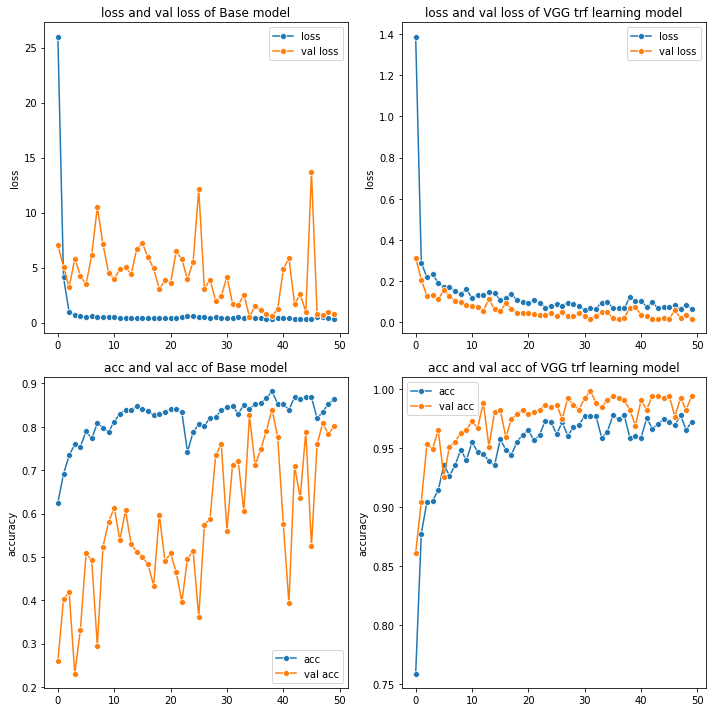

In [46]:
# DISPLAY RESULTS FOR BASE AND VGG 

plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.lineplot(x=basemodel_df.index, y='loss', data=basemodel_df, label='loss',marker = 'o')
sns.lineplot(x=basemodel_df.index, y='val_loss', data=basemodel_df, label='val loss',marker = 'o')
plt.title('loss and val loss of Base model')

plt.subplot(222)
sns.lineplot(x=vgg16model_df.index, y='loss', data=vgg16model_df, label='loss',marker = 'o')
sns.lineplot(x=vgg16model_df.index, y='val_loss', data=vgg16model_df, label ='val loss',marker = 'o')
plt.title('loss and val loss of VGG trf learning model')


plt.subplot(223)
sns.lineplot(x=basemodel_df.index, y='accuracy', data=basemodel_df, label='acc',marker = 'o')
sns.lineplot(x=basemodel_df.index, y='val_accuracy', data=basemodel_df, label='val acc',marker = 'o')
plt.title('acc and val acc of Base model')

plt.subplot(224)
sns.lineplot(x=vgg16model_df.index, y='accuracy', data=vgg16model_df, label='acc',marker = 'o')
sns.lineplot(x=vgg16model_df.index, y='val_accuracy', data=vgg16model_df, label='val acc',marker = 'o')
plt.title('acc and val acc of VGG trf learning model')

plt.tight_layout()
plt.show()

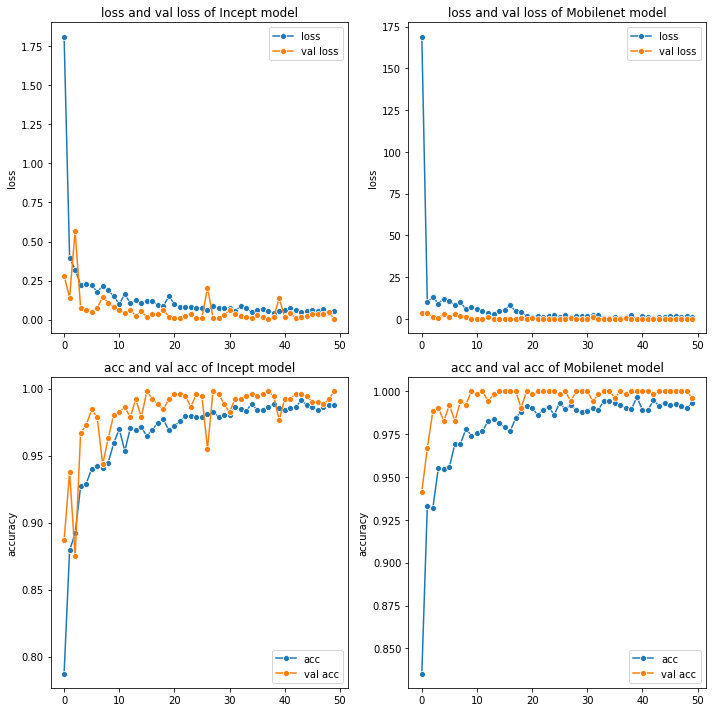

In [47]:
# DISPLAY RESULTS FOR INCEPTION V3 AND MOBILENET V2

plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.lineplot(x=inceptmodel_df.index, y='loss', data=inceptmodel_df, label='loss',marker = 'o')
sns.lineplot(x=inceptmodel_df.index, y='val_loss', data=inceptmodel_df, label='val loss',marker = 'o')
plt.title('loss and val loss of Incept model')

plt.subplot(222)
sns.lineplot(x=mobilemodel_df.index, y='loss', data=mobilemodel_df, label='loss',marker = 'o')
sns.lineplot(x=mobilemodel_df.index, y='val_loss', data=mobilemodel_df, label ='val loss',marker = 'o')
plt.title('loss and val loss of Mobilenet model')


plt.subplot(223)
sns.lineplot(x=inceptmodel_df.index, y='accuracy', data=inceptmodel_df, label='acc',marker = 'o')
sns.lineplot(x=inceptmodel_df.index, y='val_accuracy', data=inceptmodel_df, label='val acc',marker = 'o')
plt.title('acc and val acc of Incept model')

plt.subplot(224)
sns.lineplot(x=mobilemodel_df.index, y='accuracy', data=mobilemodel_df, label='acc',marker = 'o')
sns.lineplot(x=mobilemodel_df.index, y='val_accuracy', data=mobilemodel_df, label='val acc',marker = 'o')
plt.title('acc and val acc of Mobilenet model')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.lineplot(x=resmodel_df.index, y='loss', data=resmodel_df, label='loss',marker = 'o')
sns.lineplot(x=resmodel_df.index, y='val_loss', data=resmodel_df, label='val loss',marker = 'o')
plt.title('loss and val loss of Resnet model')

plt.subplot(222)
sns.lineplot(x=efnmodel_df.index, y='loss', data=efnmodel_df, label='loss',marker = 'o')
sns.lineplot(x=efnmodel_df.index, y='val_loss', data=efnmodel_df, label ='val loss',marker = 'o')
plt.title('loss and val loss of Efn model')


plt.subplot(223)
sns.lineplot(x=resmodel_df.index, y='accuracy', data=resmodel_df, label='acc',marker = 'o')
sns.lineplot(x=resmodel_df.index, y='val_accuracy', data=resmodel_df, label='val acc',marker = 'o')
plt.title('acc and val acc of Resnet model')

plt.subplot(224)
sns.lineplot(x=efnmodel_df.index, y='accuracy', data=efnmodel_df, label='acc',marker = 'o')
sns.lineplot(x=efnmodel_df.index, y='val_accuracy', data=efnmodel_df, label='val acc',marker = 'o')
plt.title('acc and val acc of Efn model')

plt.tight_layout()
plt.show()

# **STEP 10. EVALUATE MODELS WITH TEST DATASET**

In [48]:
# 10.1 DATASET FOR TESTING

test_ds = image_dataset_from_directory(
    directory='/kaggle/input/grocery2/test/test/',
    class_names=['Fruit', 'Packages', 'Vegetables'],
    batch_size=batch_size,
    image_size=image_size,
    seed=rand_seed, 
    shuffle=True,
    label_mode='categorical'
)


Found 2485 files belonging to 3 classes.


In [49]:
# 10.1 EVALUATE BASE MODEL

scorebase = basemodel.evaluate(test_ds)
print('\nTest loss: %.6f, Test accuracy: %.6f,  Test Precision: %.6f, Test Recall: %.6f, Test AuC: %.6f' % tuple(scorebase))

#print(basemodel.metrics_names)

78/78 [==============================] - 11s 125ms/step - loss: 1.4105 - accuracy: 0.7473 - precision: 0.7517 - recall: 0.7445 - auc: 0.8810

Test loss: 1.410484, Test accuracy: 0.747284,  Test Precision: 0.751727, Test Recall: 0.744467, Test AuC: 0.880986


In [50]:
# 10.2 EVALUATE VGG16

scorevgg16 = vgg16model.evaluate(test_ds)
print('\nTest loss: %.6f, Test accuracy: %.6f,  Test Precision: %.6f, Test Recall: %.6f, Test AuC: %.6f' % tuple(scorevgg16))

#print(basemodel.metrics_names)

78/78 [==============================] - 8s 99ms/step - loss: 0.4526 - accuracy: 0.8958 - precision_1: 0.8961 - recall_1: 0.8954 - auc_1: 0.9686

Test loss: 0.452637, Test accuracy: 0.895775,  Test Precision: 0.896093, Test Recall: 0.895372, Test AuC: 0.968648


In [51]:
# 10.3 EVALUATE INCEPTION V3

scoreincept = inceptmodel.evaluate(test_ds)
print('\nTest loss: %.6f, Test accuracy: %.6f,  Test Precision: %.6f, Test Recall: %.6f, Test AuC: %.6f' % tuple(scoreincept))

#print(basemodel.metrics_names)

78/78 [==============================] - 7s 64ms/step - loss: 0.3778 - accuracy: 0.9553 - precision_2: 0.9553 - recall_2: 0.9553 - auc_2: 0.9810

Test loss: 0.377831, Test accuracy: 0.955332,  Test Precision: 0.955332, Test Recall: 0.955332, Test AuC: 0.981049


In [55]:
# 10.4 EVALUATE MOBILENET V2

scoremobile = mobilemodel.evaluate(test_ds)
print('\nTest loss: %.6f, Test accuracy: %.6f,  Test Precision: %.6f, Test Recall: %.6f, Test AuC: %.6f' % tuple(scoremobile))

#print(basemodel.metrics_names)


78/78 [==============================] - 5s 55ms/step - loss: 19.9238 - accuracy: 0.9658 - precision_3: 0.9658 - recall_3: 0.9658 - auc_3: 0.9749

Test loss: 19.923834, Test accuracy: 0.965795,  Test Precision: 0.965795, Test Recall: 0.965795, Test AuC: 0.974929


In [ ]:
#10.5 EVALUATE RESNET 

scoreres = resmodel.evaluate(test_ds)
print('\nTest loss: %.6f, Test accuracy: %.6f,  Test Precision: %.6f, Test Recall: %.6f, Test AuC: %.6f' % tuple(scoreres))

#print(basemodel.metrics_names)

In [ ]:
#10.6 EVALUATE EFFICIENTNET

scoreefn = efnmodel.evaluate(test_ds)
print('\nTest loss: %.6f, Test accuracy: %.6f,  Test Precision: %.6f, Test Recall: %.6f, Test AuC: %.6f' % tuple(scoreefn))

#print(basemodel.metrics_names)

In [56]:
# 10.7 PUTTING ALL RESULTS TOGETHER 

test_loss = []
test_accuracy = []
test_precision = []
test_recall = []
test_auc = []

models = [basemodel, vgg16model, inceptmodel, mobilemodel]
model_name = ['Base Model', 'VGG16', 'Inception', 'Mobilenet']
model_df = pd.DataFrame({'Model': model_name})

for mod in models:
    score = mod.evaluate(test_ds)
    test_loss.append(score[0])
    test_accuracy.append(score[1])
    test_precision.append(score[2])
    test_recall.append(score[3])
    test_auc.append(score[4])

model_df['Test Loss'] = test_loss
model_df['Test Accuracy'] = test_accuracy
model_df['Test Precision'] = test_precision
model_df['Test Recall'] = test_recall
model_df['Test AuC'] = test_auc
  
print(model_df) 

78/78 [==============================] - 5s 56ms/step - loss: 19.9238 - accuracy: 0.9658 - precision_3: 0.9658 - recall_3: 0.9658 - auc_3: 0.9749
        Model  Test Loss  Test Accuracy  Test Precision  Test Recall  Test AuC
0  Base Model   1.410484       0.747284        0.751727     0.744467  0.880986
1       VGG16   0.452637       0.895775        0.896093     0.895372  0.968648
2   Inception   0.377831       0.955332        0.955332     0.955332  0.981049
3   Mobilenet  19.923838       0.965795        0.965795     0.965795  0.974929


This is a FRUIT


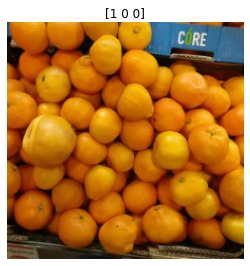

In [58]:
# 10.8  DO A SIMPLE TEST

# PICK A RANDOM PRODUCT 

class_names =['FRUIT', 'PACKAGE', 'VEGETABLE']

plt.figure(figsize=(20,20))

for images, labels in test_ds.take(1):
    for i in range(1):
        ax = plt.subplot(4, 4, i+1)
        ax.imshow(images[i].numpy().astype('uint8'))
        ax.set_title(labels[i].numpy().astype('uint8')  )
        ax.axis('off')
        print(f'This is a {class_names[np.argmax(labels[i])]}')
        plt.show()

#print(images[0])

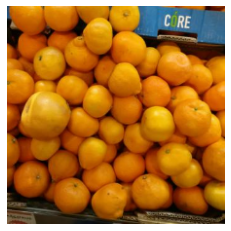

[1. 0. 0.]
1.0
You have picked a FRUIT


In [59]:
# PREDICT USING MOBILENET

img_array = keras.preprocessing.image.img_to_array(images[0])
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions_mob = mobilemodel.predict(img_array)
score = predictions_mob[0]
plt.imshow(img_array[0].numpy().astype('uint8'))
plt.axis('off')
plt.show()

print(score)
#np.argmax(score)
print(np.max(score))

# Generate arg maxes for predictions
print(f'You have picked a {class_names[np.argmax(score)]}')